# Census Income Example
This is a Keras example of classification problem. To simplify the data preparation part I used the Census problem from the Sci-Kit Learn class.

The dataset comes from http://archive.ics.uci.edu/. 

Data extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). The data was also preprocessed for the purpose of this example.

Prediction task is to determine whether a person makes over 50K a year.


### List of attributes:

##### Features
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



##### Labels
- income - >50K, <=50K. 

# Install tensorflow
If necessary uncomment one of the lines below

In [ ]:
# Tensorflow installation - uncomment if necessary
#!pip install tensorflow

# Imports

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

In [ ]:
df = pd.read_csv("https://github.com/PrzemekSekula/DeepLearningClasses1/raw/master/data/census.csv")



# Data preparation
### Selecting columns
Personaly I decided to delete the following columns:
- education - we have education-num, this is enough
- marital status - too many classes
- relationship - I am not sure if it is useful, and there are many classes
- race - I am not sure if it is useful
- native-country - too many classes

**I deleted many columns just to make the task easier to read. Students are encouraged to experiment with the columns and check if they can improve the results.**


In [ ]:
df = df[['age', 'workclass', 'education-num', 'occupation', 
         'sex', 'hours-per-week', 'income']]

df.head()

,age,workclass,education-num,occupation,sex,hours-per-week,income
0,39,State-gov,13,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,Male,13,<=50K
2,38,Private,9,Handlers-cleaners,Male,40,<=50K
3,53,Private,7,Handlers-cleaners,Male,40,<=50K
4,28,Private,13,Prof-specialty,Female,40,<=50K


### Data preprocessing

#### First step - change the labels into binary values.

In [ ]:
df.income=(df.income=='>50K').astype(int)
print(df.income.value_counts())
df.head(10)

0    24720
1     7841
Name: income, dtype: int64


,age,workclass,education-num,occupation,sex,hours-per-week,income
0,39,State-gov,13,Adm-clerical,Male,40,0
1,50,Self-emp-not-inc,13,Exec-managerial,Male,13,0
2,38,Private,9,Handlers-cleaners,Male,40,0
3,53,Private,7,Handlers-cleaners,Male,40,0
4,28,Private,13,Prof-specialty,Female,40,0
5,37,Private,14,Exec-managerial,Female,40,0
6,49,Private,5,Other-service,Female,16,0
7,52,Self-emp-not-inc,9,Exec-managerial,Male,45,1
8,31,Private,14,Prof-specialty,Female,50,1
9,42,Private,13,Exec-managerial,Male,40,1


#### Second step - change the `sex` column into binary values

In [ ]:
df=pd.get_dummies(df,columns=['sex'],drop_first=True)
df.head()

,age,workclass,education-num,occupation,hours-per-week,income,sex_Male
0,39,State-gov,13,Adm-clerical,40,0,1
1,50,Self-emp-not-inc,13,Exec-managerial,13,0,1
2,38,Private,9,Handlers-cleaners,40,0,1
3,53,Private,7,Handlers-cleaners,40,0,1
4,28,Private,13,Prof-specialty,40,0,0


#### Third step - replace rare classes

Let's check if we have any rare classes

In [ ]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Then we should replace rare classes for one-hot encoded columns

In [ ]:
df.loc[df.workclass.isin(['Without-pay','Never-worked']),'workclass']='?'
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: workclass, dtype: int64

In [ ]:
df.loc[df.occupation.isin(['Protective-serv','Priv-house-serv','Armed-Forces']),'occupation']="?"
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
?                    2650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Name: occupation, dtype: int64

#### Final step - one hot encoding

In [ ]:
df=pd.get_dummies(df,columns=['workclass','occupation'])
print(df.shape)
print(df.columns)
df.head()

(32561, 24)
Index(['age', 'education-num', 'hours-per-week', 'income', 'sex_Male',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving'],
      dtype='object')


,age,education-num,hours-per-week,income,sex_Male,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,13,40,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,13,13,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,38,9,40,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,53,7,40,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,28,13,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## Splitting dataset

Let's split the dataset into features and labels first.
- `income` is the label (`y`)
- all other columns are features (`X`)

In [ ]:
y=df.income
X=df.drop('income',axis=1)

### Train test split
#### NOTE: This time we want to split the data into 3 datasets
Split ratio: 60, 20, 20

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,
                                              stratify=y,random_state=1 )
X_valid,X_test,y_valid,y_test=train_test_split(X_test,y_test,test_size=0.5,
                                              stratify=y_test,random_state=1 )

print("X train shape:",X_train.shape)
print("Y train shape:",y_train.shape)

print("X train shape:",X_valid.shape)
print("Y train shape:",y_valid.shape)

print("X train shape:",X_test.shape)
print("Y train shape:",y_test.shape)


X train shape: (19536, 23)
Y train shape: (19536,)
X train shape: (6512, 23)
Y train shape: (6512,)
X train shape: (6513, 23)
Y train shape: (6513,)


# Keras

Import modules

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras import optimizers

## Building model

Let's define the hyperparameters first

In [ ]:
CELLS_1=32 #warstwy ukryte
CELLS_2=8

LEARNING_RATE=0.001
EPOCHS=10
BATCH_SIZE=128 #kolejne potegi 2 bo komputery licza w systemie 2 nie oplaca sie dawac 100 bo liczy mniej a robi tyle samo ile dla 128

NR_INPUTS=X_train.shape[1]
print ('X_train dataset cointains {} features (columns).'.format(NR_INPUTS))


X_train dataset cointains 23 features (columns).


Now we may build the model

In [ ]:
model=Sequential()

model.add(Dense(CELLS_1,input_shape=[NR_INPUTS,],activation="relu"))
model.add(Dense(CELLS_2,activation="relu"))
model.add(Dense(1,activation='sigmoid'))

optimizer =optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

model.summary()
#32*23+32=768
#8*32+8=264
#1*8+1=9
#nie ma sensu zeby neuronow w 1 warstwie (32) bylo ponad 2 razy wiecej niz
#liczby naszych features (23)
#jesli mamy wiecej parametrow (1041) niz wierszy (ok 20k) w naszych zbiorze treningowym to możemy miec overfitting
#


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                768       
                                                                 
 dense_37 (Dense)            (None, 8)                 264       
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(X_train,y_train,
                  validation_data=(X_valid,y_valid),
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS
)


Epoch 1/10
153/153 [==============================] - 1s 4ms/step - loss: 0.8530 - accuracy: 0.6974 - val_loss: 0.5611 - val_accuracy: 0.7592
Epoch 2/10
153/153 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7592 - val_loss: 0.5301 - val_accuracy: 0.7592
Epoch 3/10
153/153 [==============================] - 0s 3ms/step - loss: 0.5144 - accuracy: 0.7592 - val_loss: 0.5027 - val_accuracy: 0.7592
Epoch 4/10
153/153 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7592 - val_loss: 0.4716 - val_accuracy: 0.7600
Epoch 5/10
153/153 [==============================] - 0s 3ms/step - loss: 0.4668 - accuracy: 0.7592 - val_loss: 0.4587 - val_accuracy: 0.7600
Epoch 6/10
153/153 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.7607 - val_loss: 0.4488 - val_accuracy: 0.7594
Epoch 7/10
153/153 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.7611 - val_loss: 0.4483 - val_accuracy: 0.7644
Epoch 

Let's display the training history

In [ ]:
def plot_train_valid_history(history):
    """
    Plots train and validation losses.
    Arguments: history - history of training (result of keras model.fit).
        history.history must be a dictionary that looks as follow:
        {
            'loss' : .....
            'valid_loss' : .....
            'acc' : .... # Optional
            'val_acc' : ..... # Optional
        }
    """
    epochs = np.arange(len(history.history['val_loss'])) + 1
    fig = plt.figure(figsize=(8, 4))
    if 'accuracy' in history.history:
        ax1 = fig.add_subplot(121)
        ax1.plot(epochs, history.history['loss'], c='b', label='Train loss')
        ax1.plot(epochs, history.history['val_loss'], c='g', label='Valid loss')
        plt.legend(loc='lower left');
        plt.grid(True)        
        
        ax1 = fig.add_subplot(122)
        ax1.plot(epochs, history.history['accuracy'], c='b', label='Train acc')
        ax1.plot(epochs, history.history['val_accuracy'], c='g', label='Valid acc')
        plt.legend(loc='lower right');
        plt.grid(True)        
         
        
    else:
        ax1 = fig.add_subplot(111)
        ax1.plot(epochs, history.history['loss'], c='b', label='Train loss')
        ax1.plot(epochs, history.history['val_loss'], c='g', label='Valid loss')
        plt.legend(loc='lower left');
        plt.grid(True)
    plt.show()



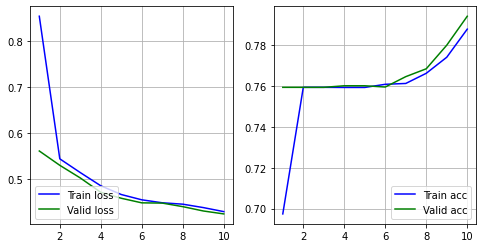

In [ ]:
plot_train_valid_history(history)
#w teorii train (na tym 2 na koncu) powinien byc troche lepszy od validation
#tu nie sa bo zbiory nie sa wystarczajaco duze

#istotne jest to czy ida w ta sama strone i czy sa do siebie zblizone
# jesli tak jest to nie ma overfittingu
#underfitting jesli oczekiwalismy wieksze accuracy
#wtedy uzyc bardziej skomplikowany model albo dodac wiecej features

In [ ]:
score,acc=model.evaluate(X_test,y_test)
print('Test score:', score)
print('Test accuracy:', acc)
# porownac ten wynik z validation
#jesli podobnie to jest git
#jesli sa duze roznice to model zoverfittowal zbior validation
#nie radzi sobie na nowych rzeczach
#wtedy zaczynnamy od nowa xD

204/204 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.8021
Test score: 0.4212067425251007
Test accuracy: 0.8020881414413452


## Task 1
Create, train and test a model with following parameters:
- First hidden layer: 32 neurons, relu activation
- Dropout after first hidden layer keep_probability = 0.5
- Second hidden layer: 32 neurons, relu activation
- Output layer: 1 neuron, sigmoid activation

Training parameters:
- Learning Rate: 0.0003
- Number of Epochs: 50
- Batch size: 128

*Note: You will need your model in task 2, so it is a good idea to write a function, which creates the model.*

![alt text](./img/model_keras_task1.png "Task 1 model")

In [ ]:
# HYPERPARAMETERS
# ENTER YOUR CODE HERE
CELLS_1=32 #warstwy ukryte
CELLS_2=32

LEARNING_RATE=0.0003
EPOCHS=50
BATCH_SIZE=128 #kolejne potegi 2 bo komputery licza w systemie 2 nie oplaca sie dawac 100 bo liczy mniej a robi tyle samo ile dla 128

NR_INPUTS=X_train.shape[1]
print ('X_train dataset cointains {} features (columns).'.format(NR_INPUTS))


X_train dataset cointains 23 features (columns).


In [ ]:
def create_model():
    # ENTER YOUR CODE HERE
    model2=Sequential()
    model2.add(Dense(CELLS_1,input_shape=[NR_INPUTS,],activation="relu"))
    model2.add(Dropout(0.5))
    model2.add(Dense(CELLS_2,activation="relu"))
    model2.add(Dense(1,activation='sigmoid'))

    optimizer =optimizers.Adam(lr=LEARNING_RATE)
    model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

    model2.summary()
    return model2


In [ ]:
model2=create_model()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 32)                768       
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 32)                1056      
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history2=model2.fit(X_train,y_train,
                  validation_data=(X_valid,y_valid),
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS
)


Epoch 1/50
153/153 [==============================] - 1s 5ms/step - loss: 1.0542 - accuracy: 0.6398 - val_loss: 0.6114 - val_accuracy: 0.7588
Epoch 2/50
153/153 [==============================] - 1s 3ms/step - loss: 0.6873 - accuracy: 0.6913 - val_loss: 0.5812 - val_accuracy: 0.7591
Epoch 3/50
153/153 [==============================] - 1s 3ms/step - loss: 0.6194 - accuracy: 0.7260 - val_loss: 0.5670 - val_accuracy: 0.7592
Epoch 4/50
153/153 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.7491 - val_loss: 0.5597 - val_accuracy: 0.7592
Epoch 5/50
153/153 [==============================] - 0s 3ms/step - loss: 0.5757 - accuracy: 0.7545 - val_loss: 0.5540 - val_accuracy: 0.7592
Epoch 6/50
153/153 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.7582 - val_loss: 0.5471 - val_accuracy: 0.7592
Epoch 7/50
153/153 [==============================] - 0s 3ms/step - loss: 0.5592 - accuracy: 0.7584 - val_loss: 0.5417 - val_accuracy: 0.7592
Epoch 

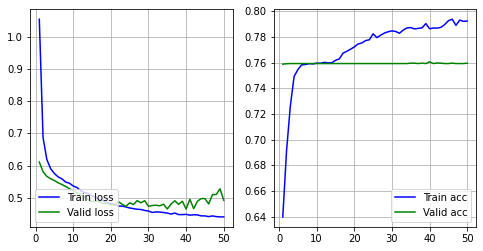

In [ ]:
# ENTER YOUR CODE HERE
plot_train_valid_history(history2)

In [ ]:
score,acc=model2.evaluate(X_test,y_test)
print('Test score:', score)
print('Test accuracy:', acc)

204/204 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7591
Test score: 0.49294954538345337
Test accuracy: 0.7590972185134888


## Question 1
- How does the model behave. Can you see any overfitting or undergitting problems?
- How you can prevent these problems?

## Task 2
Normalize your features. Use StandardScaler from sklearn.preprocessing library. Then train your model on the normalized features. Did it change anything with the behaviour of the model?

In [ ]:
from sklearn.preprocessing import StandardScaler
# ENTER YOUR CODE HERE
standard=StandardScaler()
X_train=standard.fit_transform(X_train)
X_test=standard.transform(X_test)
X_valid=standard.transform(X_valid)

# fit tylko na zbiorze treningowym zeby uniknac data leakage
#transform na wszystkich

In [ ]:
# Create and train the model
# ENTER YOUR CODE HERE
model3=create_model()



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                768       
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_43 (Dense)            (None, 32)                1056      
                                                                 
 dense_44 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history3=model3.fit(X_train,y_train,
                  validation_data=(X_valid,y_valid),
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS
)

Epoch 1/50
153/153 [==============================] - 1s 4ms/step - loss: 0.5457 - accuracy: 0.7441 - val_loss: 0.4829 - val_accuracy: 0.7604
Epoch 2/50
153/153 [==============================] - 1s 4ms/step - loss: 0.4897 - accuracy: 0.7634 - val_loss: 0.4502 - val_accuracy: 0.7796
Epoch 3/50
153/153 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.7701 - val_loss: 0.4339 - val_accuracy: 0.8030
Epoch 4/50
153/153 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7791 - val_loss: 0.4251 - val_accuracy: 0.8099
Epoch 5/50
153/153 [==============================] - 1s 3ms/step - loss: 0.4488 - accuracy: 0.7847 - val_loss: 0.4192 - val_accuracy: 0.8130
Epoch 6/50
153/153 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 0.7907 - val_loss: 0.4147 - val_accuracy: 0.8120
Epoch 7/50
153/153 [==============================] - 1s 3ms/step - loss: 0.4438 - accuracy: 0.7880 - val_loss: 0.4113 - val_accuracy: 0.8168
Epoch 

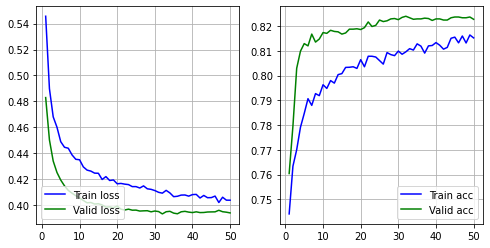

In [ ]:
plot_train_valid_history(history3)

In [ ]:
score,acc=model3.evaluate(X_test,y_test)
print('Test score:', score)
print('Test accuracy:', acc)

204/204 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8174
Test score: 0.3998812735080719
Test accuracy: 0.8174420595169067
